In [ ]:
%matplotlib inline
#from pylab import imshow
#import matplotlib.pyplot as plt
from IPython.display import display
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
# Loading your IBM Q account(s)
provider = IBMQ.load_account()

In [ ]:
# Para multi_qbits, usaremos qasm simulator (más inmediato ver estados en histogramas)
def proceed(quantum_circuit):
    
    # Simulator
    simulator = Aer.get_backend('qasm_simulator')
    
    # Execution
    result = execute(quantum_circuit,simulator,shots=1).result()
    
    # Assignation
    results=result.get_counts(quantum_circuit)
      
    # Return
    return results 

In [ ]:
def int_control(init=1,end=10,string=False):

    while True:

        try:
            
            if string:
                var=int(input(string))
            else:
                var=int(input("\nPlease introduce an int number: ")) 

            if var<init:

                print(f"The number needs to be higher or equal than {init}.\n")

            elif var>end:

                print(f"The number needs to be lower or equal to {end}.\n")

            else:

                return var

        except ValueError:

            print("The given value is not valid.\n")

In [ ]:
def str_control(string=False):

    while True:

        try:
            
            if string:
                var=input(string)
            else:
                var=input("\nPlease introduce a name: ")

            return var

        except ValueError:

            print("The given value is not valid.\n")

In [ ]:
%run -i 'levels/2qubit.py'
%run -i 'levels/3qubit.py'
%run -i 'levels/4qubit.py'
%run -i 'levels/5qubit.py'
%run -i 'levels/6qubit.py'

from IPython.display import clear_output

# Este programa SOBREABUSA de imágenes...
from IPython.display import Image
PATH = "images/"

# Wait times
import time

def battle(n,nlevels,clearS,playerName,score,battles):

    # establishment of initial HP and MP
    HP=4+4*(n-2)
    HPMax=HP;
    MP=3+3*(n-2)
    MPMax=MP;

    for stage in range(nlevels[n]): # número de stages
        score_stage=0
  
        if n==2:
            qcEn,battle=level1(stage+1)
            if stage==6:
                winCond='01'
            else:
                winCond='11'
        if n==3:
            qcEn,battle=level2(stage+1)
            winCond='111'
        if n==4:
            qcEn,battle=level3(stage+1)
            winCond=['1011', '1111']
        if n==5:
            qcEn,battle=level4(stage+1)
            winCond='11111'
        if n==6:
            qcEn,battle=level5(stage+1)
            winCond='111111'   
        
        # variables control
        endBattle=0
        endGame=0

        while HP>0 and endBattle==0:

            # PLAYER CHOICE concentra toda la interacción del jugador
            qcPl=player_choice(qcEn,battle,n,MP,MPMax,HP,HPMax,playerName,winCond,stage)
            qcT=qcPl+qcEn
            
            # limpiando la pantalla
            clear_output(wait=True)
            
            # mostrar circuito
            display(battle,qcT.draw())

            #result, count, qsphere=proceed(qcT)
            result=proceed(qcT)

            # depuración
            print(f"Your result: {result}")
            print(f"Expected result: {winCond}")

            # VICTORY COND
            if (len(list([winCond]))==1 and winCond in result.keys()) or (len(winCond)==2 and (winCond[0] in result.keys() or winCond[1] in result.keys())):
                # limpiando la pantalla
                clear_output(wait=True)
                # ¡Victoria!
                battle=Image(filename = PATH + "encuentro2_0.png", width=300, height=300)
                display(battle,qcT.draw())
                print('You won!')
                endBattle=1
                # battles
                battles=battles+1
                
                # EXCEPCIONES
                if (len(winCond)==2 and '1111' in result.keys()) or winCond=='01':
                    if HP+2*(n-1)>HPMax:
                        HP=HPMax
                    else:
                        HP=HP+2*(n-1)
                    score_stage=score_stage+100

                # score
                score_stage=score_stage+100
                score=score+score_stage
                if score<0:
                    score=0
            
                if stage<nlevels[n]-1:
                    if str_control(string='Proceed further? Y/N: ')=='N':
                        endGame=1
                        break
                    elif n==5 and stage>=2: #JEFE FINAL
                        print('Skeletor does not allow recovery!')
                    else:
                        if HP+1*(n-1)>HPMax:
                            HP=HPMax
                        else:
                            HP=HP+1*(n-1)
                        if MP+1*(n-1)>MPMax:
                            MP=MPMax
                        else:
                            MP=MP+1*(n-1)
                # VICTORIA DEFINITIVA
                else:
                    time.sleep(3)
                    # limpiando la pantalla
                    clear_output(wait=True)
                    if n==5:
                        print("You successfully conquered the Quanta Abyss!")
                        # VICTORY FLAG
                        clearS=1
                        endGame=1
                    elif n==6:
                        print("You succesfully defeated the Shadow Demon in your revisit!")
                        endGame=1
                    else:
                        print("You successfully cleared this floor of the Quanta Abyss!")
                    break
                    
            # take a hit lol
            else:
                score_stage=score_stage-20
                HP=HP-n
                MP=MPMax
                print(f'Enemies attack! You lost {n} HP...')
                time.sleep(2)
                if HP<=0:
                    HP=0
                else:
                    if str_control(string='\nKeep fighting? Y/N: ')=='Y':
                        continue
                    else:
                        endBattle=1
                        endGame=1
        # DERROTA...
        if HP<=0:
            # limpiando la pantalla
            clear_output(wait=True)
            YOU_LOST=Image(filename = PATH + "heman-smile.gif", width=300, height=300)
            display(YOU_LOST)
            print('You were defeated...')
            endBattle=1
            endGame=1
            break
            
        if endGame==1:
            break
            
    # Fin del juego
    print("Here are your results:")
    print(f"Player: {playerName}\nScore: {score}\nBattles won: {battles}")
    
    scoreboard=open(f"scoreboard.txt","a")

    scoreboard.write(playerName+','+str(score)+','+str(battles)+'\n')
    #np.genfromtxt('col.txt',dtype='str')
    scoreboard.close()
    
    return endGame, clearS,score,battles


In [ ]:
# Menú del jugador
def player_choice(qcEn,battle,n,MP,MPMax,HP,HPMax,playerName,winCond,stage):
    # Circuit generation
    q = QuantumRegister(n, 'q')
    c = ClassicalRegister(n, 'c')
    qc = QuantumCircuit(q, c)
    
    if n==2:
        gates = {'X': [1,1], 'H': [2,1], 'Z': [3,1], 'END': [0,0]}
    elif n==3 or n==4:
        gates = {'X': [1,1], 'H': [2,1], 'Z': [3,1], 'Y': [4,1], 'S': [5,1], 'T': [6,1], 'CNOT': [7,2], 'END': [0,0]}       
    elif n==5 or n==6:
        gates = {'X': [1,1], 'H': [2,1], 'Z': [3,1], 'Y': [4,1], 'S': [5,1], 'T': [6,1], 'CNOT': [7,2], 'SWAP': [8,2], 'CCNOT': [9,3],'END': [0,0]}
    
    while True:
        
        # Para ir limpiando la pantalla
        clear_output(wait=True)
        print(f"Stage: {stage}. Condición de victoria: {winCond}\n")

        print(f"Jugador: {playerName}\n")
        print(f"HP: {HP}/{HPMax}")
        print(f"MP: {MP}/{MPMax}")
        
        display(battle,(qc+qcEn).draw())
        
        print(f"Available techniques:\n{gates.keys()}")

        if MP==0:
            if input("You already spent all of your MP. Proceed? Y/N:")=='Y':
                break
            else:
                qc = QuantumCircuit(q, c)
                MP=MPMax
                continue
                
        while True:
            
            select=str_control(string='\nPlease write a gate included on the list above: ').upper()
            if select in gates.keys():
                break
            else:
                print('Invalid option.')

        # qubit decision
        if MP-gates[select][1]<0:
            print("You do not have enough MP for this action.\nPlease select another gate or end your turn.")
            continue
        else:
            MP=MP-gates[select][1]

        if gates[select][0]==7:
            while True:
                control=int_control(init=0,end=n-1,string=f'\nPlease select the controller (int variable between {0} and {n-1}): ')
                target=int_control(init=0,end=n-1,string=f'\nPlease select the target (int variable between {0} and {n-1}): ')
                if control==target:
                    print("No control or target can share the same qubit.")
                else:
                    break
            qc.cx(control,target)

        elif gates[select][0]==8:
            while True:
                qubit1=int_control(init=0,end=n-1,string=f'\nPlease select the first qubit (int variable between {0} and {n-1}): ')
                qubit2=int_control(init=0,end=n-1,string=f'\nPlease select the second qubit (int variable between {0} and {n-1}): ')
                if control==target:
                    print("Both qubits cannot be the same.")
                else:
                    break
            qc.swap(qubit1,qubit2)

        elif gates[select][0]==9:
            while True:
                control1=int_control(init=0,end=n-1,string=f'\nPlease select the first controller (int variable between {0} and {n-1}): ')
                control2=int_control(init=0,end=n-1,string=f'\nPlease select the second controller (int variable between {0} and {n-1}): ')
                target=int_control(init=0,end=n-1,string=f'\nPlease select the target (int variable between {0} and {n-1}): ')
                if control1==target or control2==target or control1==5:
                    print("No control or target can share the same qubit.")
                else:
                    break
            qc.ccx(control1,control2,target)

        elif gates[select][0]==0:
            break

        else:
            while True:
                qubit=int_control(init=0,end=n-1,string=f'\nPlease select the qubit (int variable between {0} and {n-1}): ')
                break
            if gates[select][0]==1:
                qc.x(qubit)
            elif gates[select][0]==2:
                qc.h(qubit)
            elif gates[select][0]==3:
                qc.z(qubit)
            elif gates[select][0]==4:
                qc.y(qubit)
            elif gates[select][0]==5:
                qc.s(qubit)
            elif gates[select][0]==6:
                qc.t(qubit)
                
    return qc

In [ ]:
# MAIN GAME (PLEASE EXECUTE THIS CELL)
def story(clearS,playerName,nlevels):
    # score
    score=0
    # battles_won
    battles=0
    #print(Alguna introducción rápida...)
    for n in range(2,5):
        endGame,clearS,score,battles=battle(n,nlevels,clearS,playerName,score,battles)
        if endGame==True:
            break
    return clearS

def extra_stage(playerName,nlevels):
    # score
    score=0
    # battles_won
    battles=0
    endGame,clearS,score,battles=battle(6,nlevels,clearS,playerName,score,battles)

def QUANTA_ABYSS():
    # INFORMACIÓN BÁSICA DEL JUEGO
    modes={'story': 1, 'extra_stage': 2, 'scoreboard': 3, 'quit': 5}
    clearS=0
    # identifiador: 2 qubits -> level 1, 3 qubits -> level 2...
    nlevels={2:7,3:5,4:1,5:5,6:1}
           
    # CUERPO
    
    print("Welcome to QuantaAbyss.")
    
    # nombre del jugador
    playerName=str_control()
    
    while True:
        choice=str_control(string="Select a gamemode writing it below:\n'story', 'extra_stage' (only after you beat the game), 'quit' to leave")
        if modes[choice]==2 and clearS==0:
            print('First, you need to complete the story mode!')
        elif choice in modes.keys():
            break
        else:
            print('Invalid option.')
    
    if modes[choice]==1:
        clearS=story(clearS,playerName,nlevels)
    elif modes[choice]==2:
        extra_stage(playerName,nlevels)

Stage: 0. Condición de victoria: 111

Jugador: Víctor

HP: 8/8
MP: 6/6


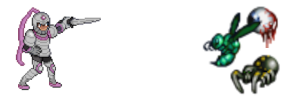

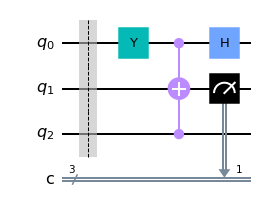

Available techniques:
dict_keys(['X', 'H', 'Z', 'Y', 'S', 'T', 'CNOT', 'END'])


In [ ]:
# EXECUTE THIS CELL AT LAST TO BEGIN THE GAME

# ==========
QUANTA_ABYSS()

###
#####
############
##################################
####################################
######################################
#######################################
##############################
###############
############################################
################################

